# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key ="ba01d29f51e9ee2039e1fbd74ceae254"
api_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data =[]
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
for i, city in enumerate (cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = api_url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()
       # Parse out the max temp, humidity, and cloudiness
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]
       city_data.append({"City": city,
                     "Lat": city_lat,
                     "Lng": city_lng,
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed": city_wind,
                     "Country": city_country,
                     "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | rizhao
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bonavista
Processing Record 6 of Set 1 | tromso
Processing Record 7 of Set 1 | ekhabi
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | camopi
Processing Record 10 of Set 1 | san cristobal
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | san juan
Processing Record 13 of Set 1 | martapura
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | namibe
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | novobirilyussy
Processing Record 19 of Set 1 | olafsvik
City not found. Skipping...
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | jamestown
Proc

Processing Record 38 of Set 4 | georgetown
Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | dalvik
Processing Record 41 of Set 4 | yerbogachen
Processing Record 42 of Set 4 | leningradskiy
Processing Record 43 of Set 4 | huarmey
Processing Record 44 of Set 4 | temozon
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | bograd
Processing Record 47 of Set 4 | tucuman
Processing Record 48 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 49 of Set 4 | lata
Processing Record 0 of Set 5 | kavieng
Processing Record 1 of Set 5 | ust-nera
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | gamba
Processing Record 4 of Set 5 | qaanaaq
Processing Record 5 of Set 5 | micheweni
Processing Record 6 of Set 5 | jackson
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | khatanga
Processing Record 9 of Set 5 | south venice
Processing Record 10 of Set 5 | viligili
City not found. Skipping...
Processing Re

Processing Record 25 of Set 8 | le port
Processing Record 26 of Set 8 | itoman
Processing Record 27 of Set 8 | suluq
Processing Record 28 of Set 8 | say
Processing Record 29 of Set 8 | bandarbeyla
Processing Record 30 of Set 8 | ulaangom
Processing Record 31 of Set 8 | ucluelet
Processing Record 32 of Set 8 | tynda
Processing Record 33 of Set 8 | luba
Processing Record 34 of Set 8 | saint-joseph
Processing Record 35 of Set 8 | mincivan
Processing Record 36 of Set 8 | camargo
Processing Record 37 of Set 8 | gisborne
Processing Record 38 of Set 8 | kuching
Processing Record 39 of Set 8 | urdoma
Processing Record 40 of Set 8 | basavana bagevadi
Processing Record 41 of Set 8 | vostok
Processing Record 42 of Set 8 | muros
Processing Record 43 of Set 8 | nazare
City not found. Skipping...
Processing Record 44 of Set 8 | marquette
Processing Record 45 of Set 8 | qena
Processing Record 46 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 8 | hvide sande
Processin

City not found. Skipping...
Processing Record 10 of Set 12 | do rud
City not found. Skipping...
Processing Record 11 of Set 12 | jadu
Processing Record 12 of Set 12 | boyolangu
Processing Record 13 of Set 12 | solvychegodsk
Processing Record 14 of Set 12 | souillac
Processing Record 15 of Set 12 | temaraia
City not found. Skipping...
Processing Record 16 of Set 12 | rio grande city
Processing Record 17 of Set 12 | jiroft
City not found. Skipping...
Processing Record 18 of Set 12 | whitehorse
Processing Record 19 of Set 12 | ugra
Processing Record 20 of Set 12 | peniche
Processing Record 21 of Set 12 | halalo
City not found. Skipping...
Processing Record 22 of Set 12 | nacala
Processing Record 23 of Set 12 | port arthur
Processing Record 24 of Set 12 | yatou
Processing Record 25 of Set 12 | tateyama
Processing Record 26 of Set 12 | petropavlovka
Processing Record 27 of Set 12 | gazanjyk
Processing Record 28 of Set 12 | hegang
Processing Record 29 of Set 12 | westport
Processing Record 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
api_key ="ba01d29f51e9ee2039e1fbd74ceae254"
api_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_list = []
lat_list = []
lng_list = []
max_temp_list = [] 
humidity_list = []
cloudiness_list = []
windspeed_list = []
counter = 0
record_counter = 0
setcount = 1

for city in cities:

    city_url = api_url + "&q=" + city
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print("---------------------------------------")
        print("We've made it to set " + str(setcount) + ".")
        print("We'll reset the record counter to " + str(record_counter) + ".")
        print("So far, we have " + str(counter) + " total records.")
        print("---------------------------------------")
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(city_url).json()
        #pprint(weather_response)
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City not found: " + city)
print(len(weather_response))

processing Record 1 of Set 1 | petropavlovsk-kamchatskiy
processing Record 2 of Set 1 | albany
processing Record 3 of Set 1 | rizhao
processing Record 4 of Set 1 | ushuaia
processing Record 5 of Set 1 | bonavista
processing Record 6 of Set 1 | tromso
processing Record 7 of Set 1 | ekhabi
processing Record 8 of Set 1 | geraldton
processing Record 9 of Set 1 | camopi
processing Record 10 of Set 1 | san cristobal
processing Record 11 of Set 1 | upernavik
processing Record 12 of Set 1 | san juan
processing Record 13 of Set 1 | martapura
processing Record 14 of Set 1 | yellowknife
processing Record 15 of Set 1 | barrow
processing Record 16 of Set 1 | namibe
processing Record 17 of Set 1 | punta arenas
processing Record 18 of Set 1 | novobirilyussy
processing Record 19 of Set 1 | olafsvik
City not found: olafsvik
processing Record 20 of Set 1 | barentsburg
City not found: barentsburg
processing Record 21 of Set 1 | jamestown
processing Record 22 of Set 1 | faanui
processing Record 23 of Set 

processing Record 34 of Set 4 | kodiak
processing Record 35 of Set 4 | brae
processing Record 36 of Set 4 | faya
processing Record 37 of Set 4 | castro
processing Record 38 of Set 4 | torbay
processing Record 39 of Set 4 | makakilo city
processing Record 40 of Set 4 | georgetown
processing Record 41 of Set 4 | constitucion
processing Record 42 of Set 4 | dalvik
processing Record 43 of Set 4 | yerbogachen
processing Record 44 of Set 4 | leningradskiy
processing Record 45 of Set 4 | huarmey
processing Record 46 of Set 4 | temozon
processing Record 47 of Set 4 | touros
processing Record 48 of Set 4 | bograd
processing Record 49 of Set 4 | tucuman
processing Record 50 of Set 4 | ngukurr
City not found: ngukurr
---------------------------------------
We've made it to set 5.
We'll reset the record counter to 0.
So far, we have 200 total records.
---------------------------------------
processing Record 1 of Set 5 | lata
processing Record 2 of Set 5 | kavieng
processing Record 3 of Set 5 | us

processing Record 5 of Set 8 | sentyabrskiy
City not found: sentyabrskiy
processing Record 6 of Set 8 | preetz
processing Record 7 of Set 8 | caucaia
processing Record 8 of Set 8 | altamira
processing Record 9 of Set 8 | port elizabeth
processing Record 10 of Set 8 | koslan
processing Record 11 of Set 8 | mount isa
processing Record 12 of Set 8 | inongo
processing Record 13 of Set 8 | muravlenko
processing Record 14 of Set 8 | kazalinsk
City not found: kazalinsk
processing Record 15 of Set 8 | colomi
processing Record 16 of Set 8 | segamat
processing Record 17 of Set 8 | tommot
processing Record 18 of Set 8 | san felipe
processing Record 19 of Set 8 | eenhana
processing Record 20 of Set 8 | huangzhai
processing Record 21 of Set 8 | northam
processing Record 22 of Set 8 | sri aman
processing Record 23 of Set 8 | totolapa
processing Record 24 of Set 8 | kaiyuan
processing Record 25 of Set 8 | college
processing Record 26 of Set 8 | bukachacha
processing Record 27 of Set 8 | le port
proce

processing Record 36 of Set 11 | antalaha
processing Record 37 of Set 11 | okha
processing Record 38 of Set 11 | aberdeen
processing Record 39 of Set 11 | motygino
processing Record 40 of Set 11 | ust-kamchatsk
City not found: ust-kamchatsk
processing Record 41 of Set 11 | kathmandu
processing Record 42 of Set 11 | tripoli
processing Record 43 of Set 11 | isla vista
processing Record 44 of Set 11 | vao
processing Record 45 of Set 11 | tumannyy
City not found: tumannyy
processing Record 46 of Set 11 | kenora
processing Record 47 of Set 11 | jiuquan
processing Record 48 of Set 11 | tiarei
processing Record 49 of Set 11 | lockhart
processing Record 50 of Set 11 | kuala terengganu
---------------------------------------
We've made it to set 12.
We'll reset the record counter to 0.
So far, we have 550 total records.
---------------------------------------
processing Record 1 of Set 12 | nemuro
processing Record 2 of Set 12 | leskolovo
processing Record 3 of Set 12 | eureka
processing Record

In [5]:
#Length of list
print(len(city_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(windspeed_list))

558
558
558
558
558
558
558


In [7]:
weather_dict={"city":city_list,
                "lat":lat_list,
                "lng":lng_list,
                "max_temp":max_temp_list,
                "humidity":humidity_list,
                "cloudiness":cloudiness_list,
                "windspeed":windspeed_list}
weather_df=pd.DataFrame(weather_dict)
weather_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,windspeed
0,Petropavlovsk-Kamchatsky,53.05,158.65,15.80,92,90,11.79
1,Albany,42.65,-73.75,27.00,53,75,19.46
2,Rizhao,35.43,119.46,30.67,62,91,4.94
3,Ushuaia,-54.81,-68.31,44.60,81,90,27.51
4,Bonavista,48.65,-53.11,30.65,96,100,31.63


In [8]:
weather_df.to_csv("cities.csv",index=False)

In [9]:
weather_df["lat"]

0      53.05
1      42.65
2      35.43
3     -54.81
4      48.65
       ...  
553    40.12
554    32.00
555   -14.47
556    31.40
557    -3.28
Name: lat, Length: 558, dtype: float64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

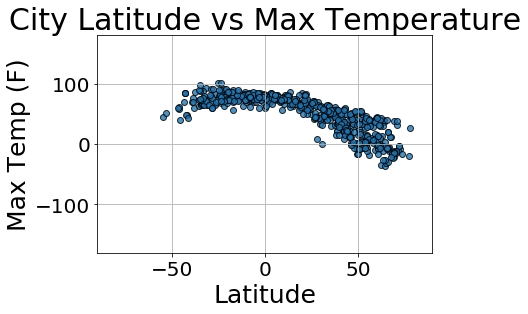

In [10]:
plt.scatter(weather_df['lat'], weather_df['max_temp'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title('City Latitude vs Max Temperature', fontsize =30)
plt.ylabel('Max Temp (F)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
#plt.show()
plt.savefig('latitute_Temperature.png')

#### Latitude vs. Humidity Plot

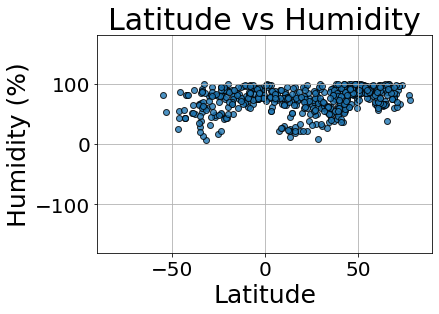

In [11]:
plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title('Latitude vs Humidity', fontsize =30)
plt.ylabel('Humidity (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
#plt.show()
plt.savefig('latitute_humidity.png')

#### Latitude vs. Cloudiness Plot

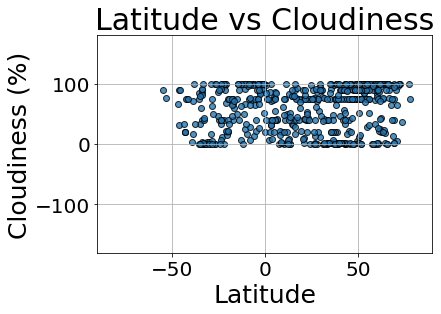

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(weather_df['lat'], weather_df['cloudiness'], edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title('Latitude vs Cloudiness', fontsize =30)
plt.ylabel('Cloudiness (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitute_cloudiness.png')

#### Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title('Latitude vs Wind Speed Plot', fontsize =30)
plt.title('Latitude vs Wind Speed', fontsize =30)
plt.ylabel('Wind Speed (mph)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-180, 180)
plt.tick_params(labelsize=20)
#plt.show()
plt.savefig('latitute_windspeed.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression